In [21]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
import random

In [22]:
#read in income race 
incomeRace_df = pd.read_csv('incomeAndRaceData_2017.csv')
incomeRace_df.head ()
#read in contaminated FIPS
FIPS_Contaminated = pd.read_csv("subset_contaminated_FIPS_df.csv")

# read in clean Fips
FIPS_Clean = pd.read_csv("Clean_Fips.csv")
FIPS_Clean.reset_index(level=0, inplace=True)

In [23]:
clean_incomeRace_df = incomeRace_df[["CountyId","Hispanic", "White", "Black", "Native", "Income", "Asian", "Pacific"]]
#clean_incomeRace_df. head()

In [24]:
# create dataframe with only CLEAN Fips 
 
FIPsClean = clean_incomeRace_df.loc[incomeRace_df["CountyId"].isin(FIPS_Clean["FIPS"])==True]
FIPsClean

#income
FIPsCleanIncome = FIPsClean[["CountyId", "Income"]]
FIPsCleanIncome

# race 
#FIPsCleanRace = FIPsClean[["CountyId","Hispanic", "White", "Black", "Native"]]
#FIPsCleanRace                           


,CountyId,Income
12,1025,33827
17,1035,30434
24,1049,38842
47,1095,41104
94,2282,64583
...,...,...
2876,51115,63622
2995,54007,41266
3013,54043,37075
3109,55123,49996


In [25]:
#create dataframe with only contaminated files 
FIPsContaminated = clean_incomeRace_df.loc[incomeRace_df["CountyId"].isin(FIPS_Contaminated["SEMS_ACTIVE_SITES.SITE_FIPS_CODE"])==True]
#FIPsContaminated
# income
#FIPsContaminatedIncome =  FIPsContaminated[["CountyId", "Income"]]
#FIPsContaminatedIncome
# race
#FIPsContaimnatedRace = FIPsContaminated[["CountyId","Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]
#FIPsContaimnatedRace

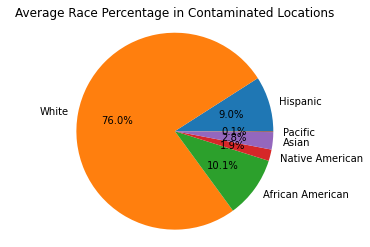

In [28]:
# pie chart for race 
#Contaminated 
Hispanic1 = np.mean(FIPsContaminated["Hispanic"])
White1= np.mean(FIPsContaminated["White"])
Black1=np.mean(FIPsContaminated["Black"])
Native1= np.mean(FIPsContaminated["Native"])
Asian1 = np.mean(FIPsContaminated["Asian"])
Pacific1= np.mean(FIPsContaminated["Pacific"])

#Clean
Hispanic2 = np.mean(FIPsClean["Hispanic"])
White2 = np.mean(FIPsClean["White"])
Black2 = np.mean(FIPsClean["Black"])
Native2 = np.mean(FIPsClean["Native"])
Asian2 = np.mean(FIPsContaminated["Asian"])
Pacific2 = np.mean(FIPsContaminated["Pacific"])

plt.title("Average Race Percentage in Contaminated Locations")
plt.pie([Hispanic2, White2 , Black2, Native2, Asian2, Pacific2], labels = ["Hispanic", "White", "African American", "Native American", "Asian", "Pacific"], autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

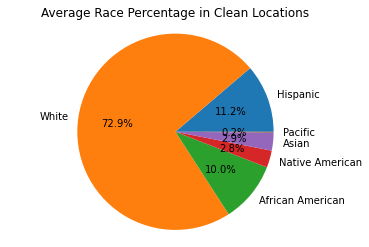

In [29]:
plt.title("Average Race Percentage in Clean Locations")
plt.pie([Hispanic1, White1 , Black1 , Native1, Asian1, Pacific1], labels = ["Hispanic", "White", "African American", "Native American", "Asian", "Pacific"], autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

In [19]:
# create a bar chart for contaminates sites income 
Bins = [0,25000,50000,75000,100000,200000]
labels = ["$0-$25K", "$25K-$50K", "$50K-$75K", "$75K-100K", "$100K+"]
FIPsCleanIncome["Income Range"] = pd.cut(FIPsCleanIncome["Income"], Bins, labels= labels)
FIPsCleanIncome

groupCleanIncome = FIPsCleanIncome.groupby("Income Range").count()
groupCleanIncome= groupCleanIncome[["Income"]]
groupCleanIncome
#groupCleanIncome.plot(kind="bar")



<ipython-input-19-a3ce36acd242>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIPsCleanIncome["Income Range"] = pd.cut(FIPsCleanIncome["Income"], Bins, labels= labels)


,Income
Income Range,
$0-$25K,0
$25K-$50K,65
$50K-$75K,28
$75K-100K,4
$100K+,0


In [13]:
# bar chart for income for clean sites income
Bins = [0,25000,50000,75000,100000,200000]
labels = ["$0-$25K", "$25K-$50K", "$50K-$75K", "$75K-100K", "$100K+"]
FIPsContaminatedIncome["Income Range"] = pd.cut(FIPsContaminatedIncome["Income"], Bins, labels= labels)

groupConIncome = FIPsContaminatedIncome.groupby("Income Range").count()
groupConIncome = groupConIncome[["Income"]]
groupConIncome
#groupConIncome.plot(kind="bar")

<ipython-input-13-ec963d00a8bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIPsContaminatedIncome["Income Range"] = pd.cut(FIPsContaminatedIncome["Income"], Bins, labels= labels)


,Income
Income Range,
$0-$25K,1
$25K-$50K,43
$50K-$75K,37
$75K-100K,14
$100K+,1


In [10]:
#combined graph
combinedIncome = pd.merge(groupCleanIncome, groupConIncome, on ="Income Range", how = "outer")
combinedIncome = combinedIncome.rename(columns={"Income_x":"Clean Sites","Income_y":"Contaminated Sites"})
combinedIncome


,Clean Sites,Contaminated Sites
Income Range,,
$0-$25K,0,1
$25K-$50K,65,43
$50K-$75K,28,37
$75K-100K,4,14
$100K+,0,1


(0.0, 70.0)

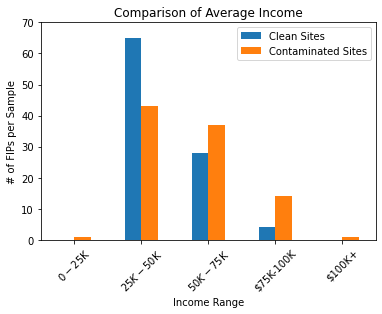

In [11]:
PLOT = combinedIncome.plot.bar(rot=45)
PLOT
#combinedIncome.plot(kind = "bar")
plt.title("Comparison of Average Income")
plt.ylabel("# of FIPs per Sample")
plt.ylim(0,70)